### Phase 2: IT / Ops Reliability Analysis

This notebook analyzes system reliability using incident and uptime data.
Key metrics include incident frequency, downtime duration, and mean time to resolution (MTTR).


In [28]:
import pandas as pd

df = pd.read_csv("../data/processed/clean_incident_data.csv")
df.head()


,IncidentID,System,Severity,OpenedTime,ResolvedTime,ResolutionMinutes
0,1,Email,High,2024-01-01 08:15:00,2024-01-01 10:45:00,150.0
1,2,CRM,Medium,2024-01-02 09:30:00,2024-01-02 12:00:00,150.0
2,3,Website,High,2024-01-03 11:00:00,2024-01-03 15:30:00,270.0
3,4,Database,Critical,2024-01-04 14:45:00,2024-01-04 20:15:00,330.0
4,5,Website,Medium,2024-01-05 10:20:00,2024-01-05 12:00:00,100.0


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IncidentID         10 non-null     int64  
 1   System             10 non-null     object 
 2   Severity           10 non-null     object 
 3   OpenedTime         10 non-null     object 
 4   ResolvedTime       10 non-null     object 
 5   ResolutionMinutes  10 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


In [30]:
total_incidents = df.shape[0]
total_incidents


10

In [31]:
incident_by_severity = (
    df.groupby("Severity")
      .size()
      .reset_index(name="incident_count")
      .sort_values("incident_count", ascending=False)
)

incident_by_severity


,Severity,incident_count
1,High,3
3,Medium,3
0,Critical,2
2,Low,2


In [32]:
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['incidentid', 'system', 'severity', 'openedtime', 'resolvedtime',
       'resolutionminutes'],
      dtype='object')

In [33]:
incident_by_system = (
    df.groupby("system")
      .size()
      .reset_index(name="incident_count")
      .sort_values("incident_count", ascending=False)
)

incident_by_system


,system,incident_count
3,Website,3
2,Email,3
1,Database,2
0,CRM,2


In [34]:
mttr_by_severity = (
    df.groupby("severity")["resolutionminutes"]
      .mean()
      .reset_index(name="avg_mttr_minutes")
      .sort_values("avg_mttr_minutes", ascending=False)
)

mttr_by_severity


,severity,avg_mttr_minutes
0,Critical,315.000000
1,High,210.000000
3,Medium,136.666667
2,Low,75.000000


In [35]:
mttr_by_system = (
    df.groupby("system")["resolutionminutes"]
      .mean()
      .reset_index(name="avg_mttr_minutes")
      .sort_values("avg_mttr_minutes", ascending=False)
)

mttr_by_system


,system,avg_mttr_minutes
1,Database,315.000000
0,CRM,180.000000
3,Website,176.666667
2,Email,100.000000


### Phase 2.2 — Reliability Metrics Analysis

This phase focuses on core IT operations reliability metrics derived from incident resolution data.

- Incident frequency was analyzed by severity and impacted system to identify operational hotspots.
- Mean Time to Resolution (MTTR) was calculated to evaluate response efficiency across incident types.
- Higher-severity incidents generally exhibited longer resolution times, highlighting prioritization trade-offs in incident response.
- System-level MTTR analysis helps identify platforms that may require additional monitoring, automation, or process improvement.

These metrics align with standard ITSM and SRE practices used to measure operational reliability.


In [36]:
df.columns


Index(['incidentid', 'system', 'severity', 'openedtime', 'resolvedtime',
       'resolutionminutes'],
      dtype='object')

In [37]:
incident_by_system = (
    df.groupby("system")
      .size()
      .reset_index(name="incident_count")
      .sort_values("incident_count", ascending=False)
)

incident_by_system


,system,incident_count
3,Website,3
2,Email,3
1,Database,2
0,CRM,2


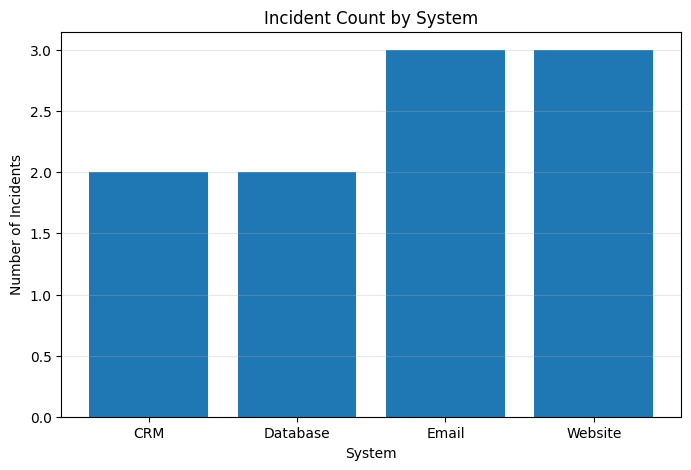

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    incident_by_system["system"],
    incident_by_system["incident_count"]
)

plt.title("Incident Count by System")
plt.xlabel("System")
plt.ylabel("Number of Incidents")
plt.grid(axis="y", alpha=0.3)

plt.savefig(
    "../visuals/incidents_by_system_count.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**Incident Count by System:**  

This chart compares the number of incidents across different systems.

Systems with higher incident counts may be less stable, more heavily used, or more complex to maintain. Identifying these systems helps prioritize reliability improvements and root-cause investigations.

This metric is beneficial for IT operations planning and risk assessment.


In [39]:
mttr_by_severity = (
    df.groupby("severity")["resolutionminutes"]
      .mean()
      .reset_index(name="avg_mttr_minutes")
      .sort_values("avg_mttr_minutes", ascending=False)
)

mttr_by_severity


,severity,avg_mttr_minutes
0,Critical,315.000000
1,High,210.000000
3,Medium,136.666667
2,Low,75.000000


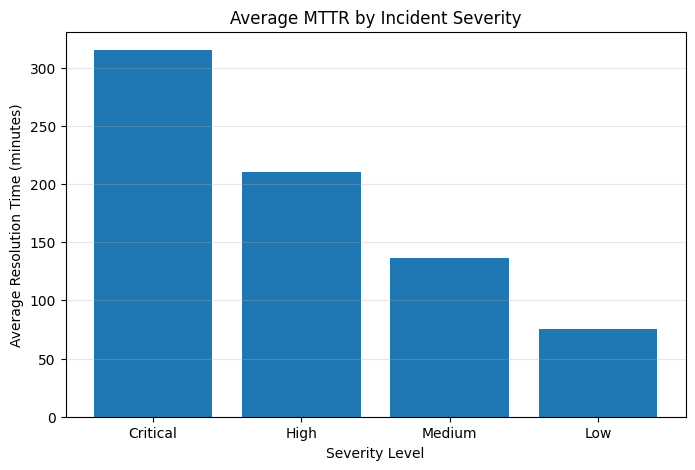

In [50]:
plt.figure(figsize=(8, 5))
plt.bar(
    mttr_by_severity["severity"],
    mttr_by_severity["avg_mttr_minutes"]
)

plt.title("Average MTTR by Incident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Average Resolution Time (minutes)")
plt.grid(axis="y", alpha=0.3)

plt.savefig(
    "../visuals/incidents_by_average_severity.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

**Average MTTR by Incident Severity**

This chart shows the average Mean Time to Resolution (MTTR) for incidents grouped by severity level.

Critical incidents take the longest to resolve on average, indicating higher complexity, greater impact, or the need for cross-team coordination. As severity decreases, resolution times drop significantly, with low-severity incidents being resolved the fastest.

This pattern aligns with expected operational behavior and highlights where incident response improvements would have the greatest impact—specifically in reducing resolution time for high-impact, critical incidents.



In [42]:
incident_by_system.to_csv(
    "../data/processed/incident_count_by_system.csv",
    index=False
)

mttr_by_severity.to_csv(
    "../data/processed/mttr_by_severity.csv",
    index=False
)


In [43]:
incident_by_system = (
    df.groupby("system")
      .size()
      .reset_index(name="incident_count")
)


In [44]:
mttr_by_system = (
    df.groupby("system")["resolutionminutes"]
      .mean()
      .reset_index(name="avg_mttr_minutes")
)


In [45]:
system_reliability = incident_by_system.merge(
    mttr_by_system,
    on="system",
    how="inner"
)

system_reliability


,system,incident_count,avg_mttr_minutes
0,CRM,2,180.000000
1,Database,2,315.000000
2,Email,3,100.000000
3,Website,3,176.666667


In [46]:
system_reliability["risk_score"] = (
    system_reliability["incident_count"] *
    system_reliability["avg_mttr_minutes"]
)

system_reliability = system_reliability.sort_values(
    "risk_score", ascending=False
)

system_reliability


,system,incident_count,avg_mttr_minutes,risk_score
1,Database,2,315.000000,630.0
3,Website,3,176.666667,530.0
0,CRM,2,180.000000,360.0
2,Email,3,100.000000,300.0


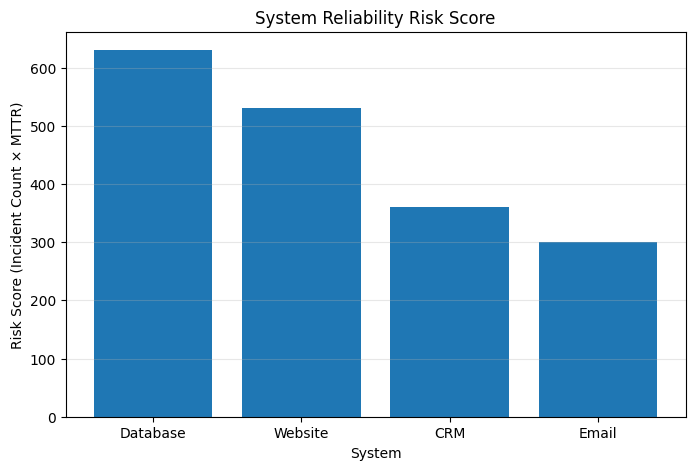

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    system_reliability["system"],
    system_reliability["risk_score"]
)

plt.title("System Reliability Risk Score")
plt.xlabel("System")
plt.ylabel("Risk Score (Incident Count × MTTR)")
plt.grid(axis="y", alpha=0.3)

plt.savefig(
    "../visuals/incidents_system_reliability.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**System Reliability Risk Score**  

This chart combines incident frequency and resolution time into a composite risk score for each system.

Systems with higher scores pose greater operational risk due to both frequent incidents and longer recovery times. These systems should be prioritized for reliability improvements, monitoring enhancements, or architectural changes.

The risk score provides a simplified, executive-friendly way to compare systems and support data-driven decision-making.


In [48]:
system_reliability.to_csv(
    "../data/processed/system_reliability_risk_summary.csv",
    index=False
)
